In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datatest = pd.read_excel('../Resource/ExperimentDataBase/spad_3.xlsx')

origin_var = datatest[['Band1蓝','Band2绿','Band3红','Band4红边','Band5近红外1','Band6近红外2','SPAD','株高','LAI','Gs','含水率']]

In [3]:
origin_var.head()

,Band1蓝,Band2绿,Band3红,Band4红边,Band5近红外1,Band6近红外2,SPAD,株高,LAI,Gs,含水率
0,0.017563,0.063363,0.030160,0.111947,0.240020,0.230200,37.466667,1.178000,2.917709,0.178455,0.431203
1,0.006993,0.025344,0.012045,0.044942,0.112771,0.092727,35.991667,1.503667,2.054150,0.295477,0.474259
2,0.012832,0.046415,0.022028,0.082061,0.205726,0.168956,35.941667,1.367167,3.599002,0.204608,0.423770
3,0.021053,0.075838,0.036377,0.133764,0.333575,0.273729,34.941667,1.101889,3.320240,0.170752,0.449212
4,0.021175,0.076440,0.036424,0.134713,0.336285,0.276091,40.300000,1.551556,3.309667,0.186866,0.437433


In [4]:
print(origin_var.isnull().sum())

Band1蓝       0
Band2绿       0
Band3红       0
Band4红边      0
Band5近红外1    0
Band6近红外2    0
SPAD         0
株高           0
LAI          0
Gs           0
含水率          0
dtype: int64


In [5]:
print(np.isinf(origin_var.astype(float)).sum())

Band1蓝       0
Band2绿       0
Band3红       0
Band4红边      0
Band5近红外1    0
Band6近红外2    0
SPAD         0
株高           0
LAI          0
Gs           0
含水率          0
dtype: int64


In [6]:
# 处理NaN值
origin_var = origin_var.fillna(method='ffill')  # 使用前一个非NaN值进行填充

# 处理inf值
origin_var = origin_var.replace([np.inf, -np.inf], np.nan)  # 将inf值替换为NaN值
origin_var = origin_var.fillna(method='ffill')  # 使用前一个非NaN值进行填充

In [7]:
def pca(X):
    """
    X: 输入的数据，每一行表示一个样本
    """
    # 1. 中心化数据
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # 2. 计算协方差矩阵
    cov = np.cov(X_centered, rowvar=False)

    # 3. 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # 4. 将特征值从大到小排序，选择前k个特征向量
    sorted_idx = np.argsort(eigenvalues)[::-1]
    k = len(eigenvalues)
    explained_variance_ratio = eigenvalues[sorted_idx] / np.sum(eigenvalues)
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    # 5. 降维
    components = eigenvectors[:, sorted_idx[:k]]
    X_transformed = np.dot(X_centered, components)

    return X_transformed, components, explained_variance_ratio, cumulative_explained_variance_ratio

In [8]:
X_transformed, components, explained_variance_ratio, cumulative_explained_variance_ratio = pca(origin_var.values)

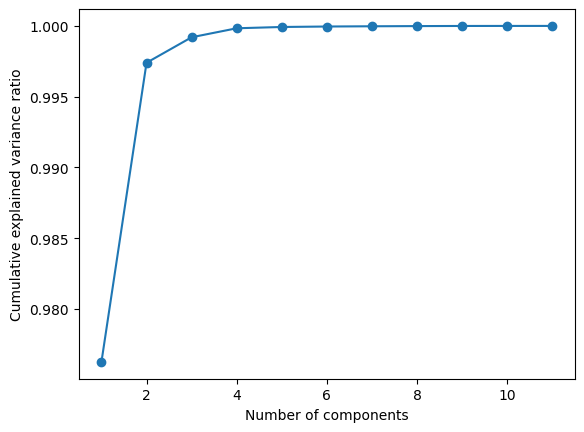

In [9]:
# 绘制解释方差比例图
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

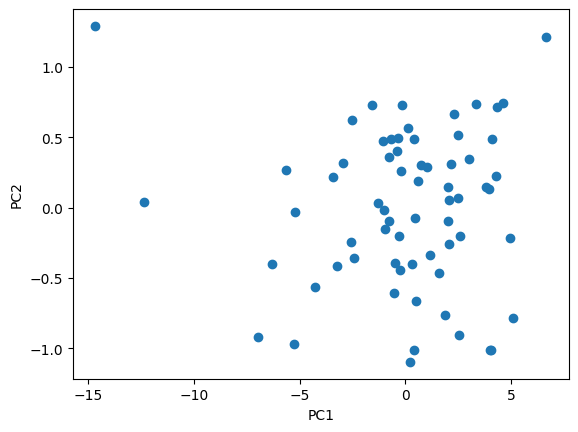

In [10]:
# 绘制降维后的数据分布图
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [11]:
print("Transformed data:\n", X_transformed)
print("Components:\n", components)
print("Explained variance ratio:\n", explained_variance_ratio)
print("Cumulative explained variance ratio:\n", cumulative_explained_variance_ratio)

Transformed data:
 [[ 2.59288112e+00 -2.01742364e-01 -1.55200782e-03 -7.35013398e-02
  -3.11960312e-02  2.12770582e-02  1.55625759e-02  1.60577056e-02
   2.93003713e-03 -8.98195190e-04 -2.03984193e-03]
 [ 4.12401985e+00  4.90109520e-01  5.00353886e-01 -1.49786449e-02
   2.11515418e-02 -1.26145229e-02 -2.17458486e-02 -2.75752755e-04
  -1.93489610e-02 -3.67508902e-05  6.78020876e-04]
 [ 4.06237067e+00 -1.01273982e+00  9.00893738e-02  4.52878738e-03
  -2.24429863e-02  5.84134295e-03  5.13178456e-03 -4.22482859e-03
   1.02857687e-02  1.70984387e-03  4.76017353e-04]
 [ 5.08012599e+00 -7.80484876e-01 -1.46038787e-01 -1.81126233e-01
  -1.01961457e-02  1.78944274e-03 -5.23542643e-03  1.56011512e-02
  -7.76250753e-03 -3.01591706e-03 -9.60276662e-04]
 [-2.70307215e-01 -4.43068349e-01  2.65861277e-01 -1.24145484e-01
   9.65655693e-03 -7.02295401e-03 -3.23079914e-03  6.19806978e-03
  -6.80299320e-03 -1.91131274e-03 -1.53653425e-03]
 [-3.55192364e-01  4.96752348e-01  3.00009659e-01 -1.03184227e-02
